In [101]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Conv2D,Dropout,MaxPool2D,Flatten,Dense
from keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

In [102]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [103]:
tf.__version__

'2.10.0'

In [104]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [105]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [106]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [107]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

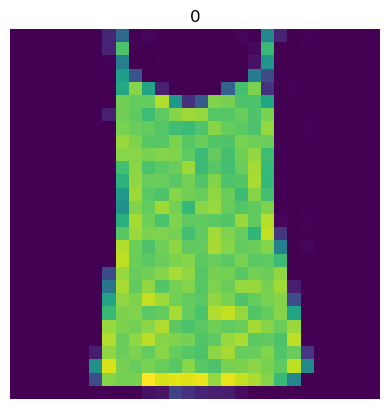

In [108]:
for i in np.arange(0, 16):
    index = random.randint(0,59999)
    plt.imshow( X_train[index] )
    plt.title(y_train[index])
    plt.axis('off')

plt.subplots_adjust(hspace=0.4)
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [109]:
X_train=X_train/255
X_test=X_test/255

In [110]:
#from sklearn.model_selection import train_test_split

#X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [111]:
# X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
# X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [112]:
model = tf.keras.Sequential()

In [113]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [114]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 dropout_6 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 4, 4, 32)         0         
 g2D)                                                 

In [115]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [139]:
with tf.device('/gpu:0'):
    hist=model.fit(X_train, y_train,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1024 - accuracy: 0.9608
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0984 - accuracy: 0.9632
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0994 - accuracy: 0.9620
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0968 - accuracy: 0.9626
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0937 - accuracy: 0.9649
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0938 - accuracy: 0.9646
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0921 - accuracy: 0.9645
Epoch 8/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0902 - accuracy: 0.9651
Epoch 9/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0883 - accuracy: 0.9666
Epoch 10/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0849 - accuracy: 0.9675

In [140]:
model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.3879 - accuracy: 0.9085


[0.3879499137401581, 0.9085000157356262]

In [141]:
pred = model.predict(X_test)

pred=np.argmax(pred,axis=1)

313/313 [==============================] - 1s 3ms/step


In [142]:
pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [143]:
labels=list(set(y_test))

1/1 [==============================] - 0s 30ms/step


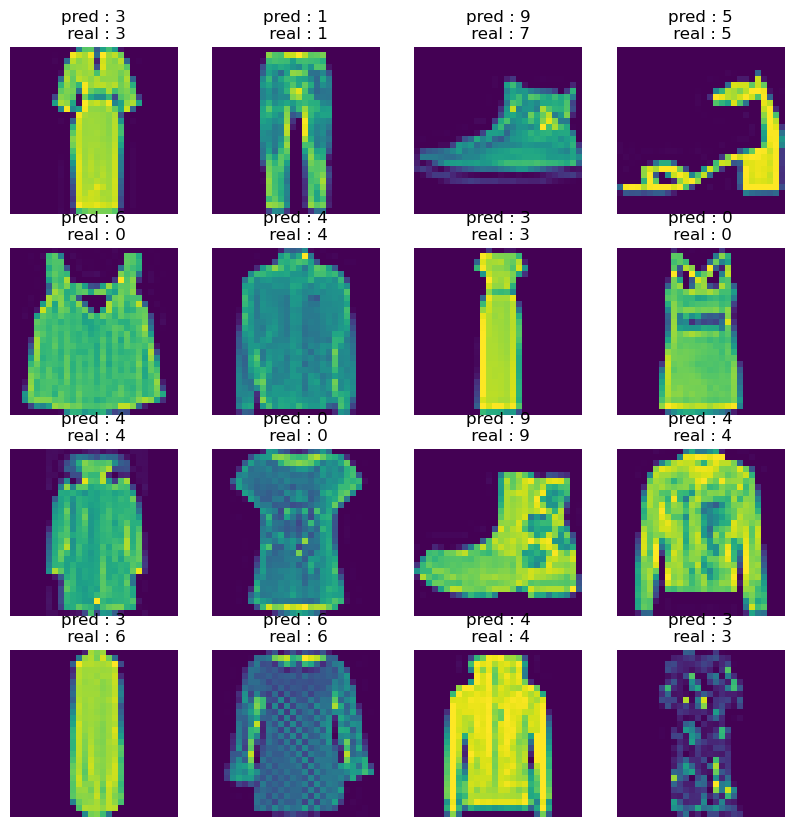

In [144]:
plt.figure(figsize=(10,10))
for i in np.arange(1, 17):
    index = random.randint(0, 9999)
    plt.subplot(4,4,i)
    plt.imshow(X_test[index])

    plt.title(
        label="pred : "
        + str(labels[np.argmax(model.predict(tf.expand_dims(X_test[index], 0)))])
        + "\n real : "
        + str(labels[y_test[index]])
    )

    plt.axis("off")

<Axes: >

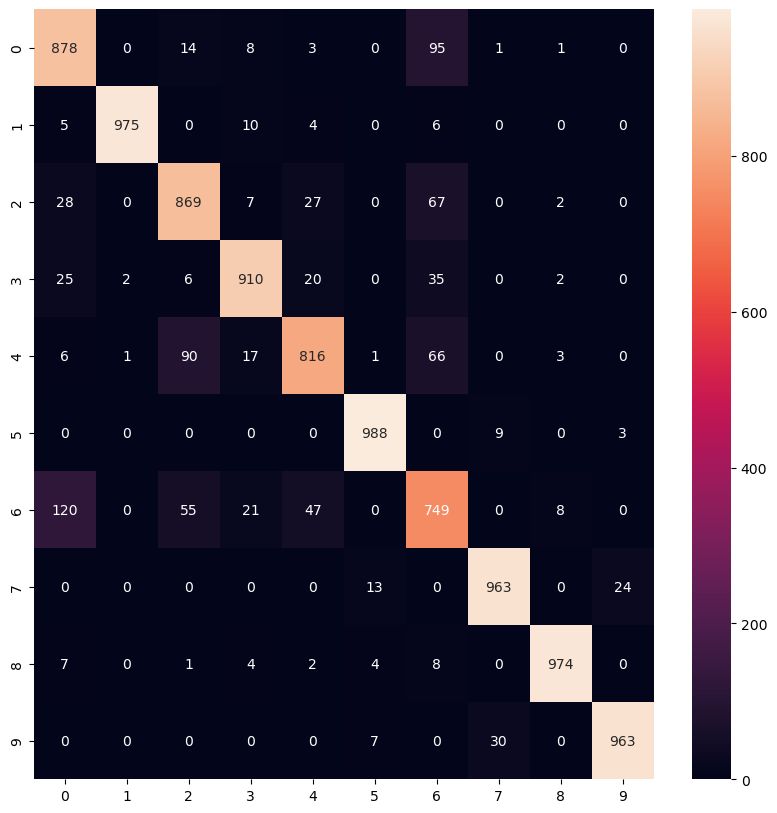

In [145]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt="d")

In [146]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.84      0.87      0.85      1000
           3       0.93      0.91      0.92      1000
           4       0.89      0.82      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.73      0.75      0.74      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [147]:
model.save('clothing_cnn.h5')

In [148]:
model.save('clothing_cnn.keras')

In [149]:
model.save_weights('clothing_cnn_weights.h5')

In [150]:
model.save_weights('clothing_cnn_weights.keras')